In [1]:
# Cell 1: Clone the GitHub repo and setup
!git clone https://github.com/prajwalbhat-14/Deep-Steganography-using-Steganogan.git
%cd Deep-Steganography-using-Steganogan

import sys
sys.path.append('/content/Deep-Steganography-using-Steganogan/Image_models')

# Install requirements if needed
!pip install opencv-python matplotlib numpy torch torchvision


Cloning into 'Deep-Steganography-using-Steganogan'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 79 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 55.76 MiB | 10.81 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/Deep-Steganography-using-Steganogan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install torch # framework
!pip install --upgrade reedsolo
!pip install --upgrade librosa
!pip install torchvision
#!pip install torchaudio
#!pip install tensorboard
#!pip install soundfile
!pip install librosa==0.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.8 MB/s eta 0:00:00
  Created wheel for librosa: filename=librosa-0.7.1-py3-none-any.whl size=1610144 sha256=574437bdec8ef05235163371dc74c02e4109dba684f265a269cb4d9d358ffb1b
  Stored in directory: /root/.cache/pip/wheels/16/24/68/0acda870d7a047f36f29e0701d9af7851737f273af193aac8f
Successfully built librosa
  Attempting uninstall: librosa
    Found existing installation: librosa 0.11.0
    Uninstalling librosa-0.11.0:
      Successfully uninstalled librosa-0.11.0


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd /content/drive/My\ Drive/

Mounted at /content/drive
/content/drive/My Drive


In [4]:
import numpy as np
#import librosa
#import librosa.display
import datetime
import matplotlib.pyplot as plt
from torch.nn.functional import binary_cross_entropy_with_logits, mse_loss
from torchvision import datasets, transforms
from IPython.display import clear_output
import torchvision
from torchvision.datasets.vision import VisionDataset
from torch.optim import Adam
from tqdm import notebook
import torch
import os.path
import os
import gc
import sys
from PIL import ImageFile, Image
#from torchaudio import transforms as audiotransforms
#import torchaudio
#import soundfile
#from IPython.display import Audio
import random


ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
epochs = 64
data_depth = 4
hidden_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LOAD_MODEL=True
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_0.041_2020-07-25_15:31:19.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_-0.003_2020-07-24_20:01:33.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_-0.022_2020-07-24_05:11:17.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_-0.041_2020-07-23_23:01:25.dat'
PATH='/content/Deep-Steganography-using-Steganogan/Image_models/DenseEncoder_DenseDecoder_0.042_2020-07-23_02_08_27.dat' ##Depth4Epoch64
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_0.005_2020-07-22_20:05:49.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_-0.019_2020-07-22_15:02:29.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_-0.020_2020-07-22_13:43:02.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_+0.048_2020-07-22_12:21:23.dat'
#PATH='/content/drive/My Drive/myresults/model/DenseEncoder_DenseDecoder_+0.017_2020-07-22_08:18:00.dat'

In [6]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from math import exp

# -*- coding: utf-8 -*-

import zlib
from math import exp

import torch
from reedsolo import RSCodec
from torch.nn.functional import conv2d

rs = RSCodec(250)


def text_to_bits(text):
    """Convert text to a list of ints in {0, 1}"""
    return bytearray_to_bits(text_to_bytearray(text))


def bits_to_text(bits):
    """Convert a list of ints in {0, 1} to text"""
    return bytearray_to_text(bits_to_bytearray(bits))


def bytearray_to_bits(x):
    """Convert bytearray to a list of bits"""
    result = []
    for i in x:
        bits = bin(i)[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])

    return result


def bits_to_bytearray(bits):
    """Convert a list of bits to a bytearray"""
    ints = []
    for b in range(len(bits) // 8):
        byte = bits[b * 8:(b + 1) * 8]
        ints.append(int(''.join([str(bit) for bit in byte]), 2))

    return bytearray(ints)


def text_to_bytearray(text):
    """Compress and add error correction"""
    assert isinstance(text, str), "expected a string"
    x = zlib.compress(text.encode("utf-8"))
    x = rs.encode(bytearray(x))
    return x

def bytearray_to_text(x):
    """Apply error correction and decompress"""
    try:
      #print('1: ',x)
      text = rs.decode(x)[0]
      #print('2: ',x)
      text = zlib.decompress(text)
      #print('3: ',x)
      return text.decode("utf-8")
    except BaseException as e:
      print(e)
      return False

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _ssim(img1, img2, window, window_size, channel, size_average = True):
    mu1 = F.conv2d(img1, window, padding = window_size//2, groups = channel)
    mu2 = F.conv2d(img2, window, padding = window_size//2, groups = channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1*mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding = window_size//2, groups = channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding = window_size//2, groups = channel) - mu2_sq
    sigma12 = F.conv2d(img1*img2, window, padding = window_size//2, groups = channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

class SSIM(torch.nn.Module):
    def __init__(self, window_size = 11, size_average = True):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        self.window = create_window(window_size, self.channel)

    def forward(self, img1, img2):
        (_, channel, _, _) = img1.size()

        if channel == self.channel and self.window.data.type() == img1.data.type():
            window = self.window
        else:
            window = create_window(self.window_size, channel)

            if img1.is_cuda:
                window = window.cuda(img1.get_device())
            window = window.type_as(img1)

            self.window = window
            self.channel = channel


        return _ssim(img1, img2, window, self.window_size, channel, self.size_average)

def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.size()
    window = create_window(window_size, channel)

    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)

    return _ssim(img1, img2, window, window_size, channel, size_average)


In [7]:
import torch
from torch import nn
import numpy

class BasicEncoder(nn.Module):
    """
    The BasicEncoder module takes an cover image and a data tensor and combines
    them into a steganographic image.

    """
    def _name(self):
      return "BasicEncoder"

    def _conv2d(self, in_channels, out_channels):
        return nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            padding=1
        )

    def _build_models(self):
        self.conv1 = nn.Sequential(
            self._conv2d(3, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv2 = nn.Sequential(
            self._conv2d(self.hidden_size + self.data_depth, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv3 = nn.Sequential(
            self._conv2d(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv4 = nn.Sequential(
            self._conv2d(self.hidden_size, 3),
        )
        return self.conv1, self.conv2, self.conv3, self.conv4

    def __init__(self, data_depth, hidden_size):
        super().__init__()
        self.data_depth = data_depth
        self.hidden_size = hidden_size
        self._models = self._build_models()
        self.name = self._name()

    def forward(self, image, data):
        x = self._models[0](image)
        x_1 = self._models[1](torch.cat([x] + [data], dim=1))
        x_2 = self._models[2](x_1)
        x_3 = self._models[3](x_2)
        return x_3


class ResidualEncoder(BasicEncoder):
    def _name(self):
      return "ResidualEncoder"

    def forward(self, image, data):
        return image + super().forward(self, image, data)


class DenseEncoder(BasicEncoder):
    def _name(self):
      return "DenseEncoder"

    def _build_models(self):
        self.conv1 = super()._build_models()[0]
        self.conv2 = super()._build_models()[1]
        self.conv3 = nn.Sequential(
            self._conv2d(self.hidden_size * 2 +
                         self.data_depth, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv4 = nn.Sequential(
            self._conv2d(self.hidden_size * 3 + self.data_depth, 3)
        )

        return self.conv1, self.conv2, self.conv3, self.conv4

    def forward(self, image, data):
        x = self._models[0](image)
        x_list = [x]
        x_1 = self._models[1](torch.cat(x_list+[data], dim=1))
        x_list.append(x_1)
        x_2 = self._models[2](torch.cat(x_list+[data], dim=1))
        x_list.append(x_2)
        x_3 = self._models[3](torch.cat(x_list+[data], dim=1))
        x_list.append(x_3)
        return image + x_3


In [8]:
import torch
from torch import nn
#from torch.nn import Sigmoid
#from torch.distributions import Bernoulli


class BasicDecoder(nn.Module):
    """
    The BasicDecoder module takes an steganographic image and attempts to decode
    the embedded data tensor.

    Input: (N, 3, H, W)
    Output: (N, D, H, W)
    """
    def _name(self):
      return "BasicDecoder"

    def _conv2d(self, in_channels, out_channels):
        return nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            padding=1
        )

    def _build_models(self):
        self.conv1 = nn.Sequential(
            self._conv2d(3, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv2 = nn.Sequential(
            self._conv2d(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv3 = nn.Sequential(
            self._conv2d(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv4 = nn.Sequential(
            self._conv2d(self.hidden_size, self.data_depth),
            #nn.Sigmoid(),
        )

        return self.conv1, self.conv2, self.conv3, self.conv4

    def forward(self, image):
        x = self._models[0](image)
        x_1 = self._models[1](x)
        x_2 = self._models[2](x_1)
        x_3 = self._models[3](x_2)
        #x_4 = Bernoulli(x_3).sample()
        return x_3

    def __init__(self, data_depth, hidden_size):
        super().__init__()
        self.data_depth = data_depth
        self.hidden_size = hidden_size
        self._models = self._build_models()
        self.name = self._name()


class DenseDecoder(BasicDecoder):
    def _name(self):
      return "DenseDecoder"

    def _build_models(self):
        self.conv1 = super()._build_models()[0]
        self.conv2 = super()._build_models()[1]
        self.conv3 = nn.Sequential(
            self._conv2d(self.hidden_size * 2, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size)
        )
        self.conv4 = nn.Sequential(
            self._conv2d(self.hidden_size * 3, self.data_depth),
            #nn.Sigmoid(),
        )

        return self.conv1, self.conv2, self.conv3, self.conv4

    def forward(self, image):
        x = self._models[0](image)
        x_list = [x]
        x_1 = self._models[1](torch.cat(x_list, dim=1))
        x_list.append(x_1)
        x_2 = self._models[2](torch.cat(x_list, dim=1))
        x_list.append(x_2)
        x_3 = self._models[3](torch.cat(x_list, dim=1))
        x_list.append(x_3)
        return x_3


In [9]:
import torch
from torch import nn


class BasicCritic(nn.Module):
    """
    The BasicCritic module takes an image and predicts whether it is a cover
    image or a steganographic image (N, 1).

    Input: (N, 3, H, W)
    Output: (N, 1)
    """
    def _name(self):
      return "BasicCritic"

    def _conv2d(self, in_channels, out_channels):
        return nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3
        )

    def _build_models(self):

        self.conv1 = nn.Sequential(
            self._conv2d(3, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv2 = nn.Sequential(
            self._conv2d(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv3 = nn.Sequential(
            self._conv2d(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
        )
        self.conv4 = nn.Sequential(
            self._conv2d(self.hidden_size, 1)
        )

        return self.conv1,self.conv2,self.conv3,self.conv4

    def __init__(self, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self._models = self._build_models()
        self.name = self._name()

    def forward(self, image):
        x = self._models[0](image)
        x_1 = self._models[1](x)
        x_2 = self._models[2](x_1)
        x_3 = self._models[3](x_2)
        return torch.mean(x_3.view(x_3.size(0), -1), dim=1)


In [10]:
def plot(name, train_epoch, values, path, save):
    clear_output(wait=True)
    plt.close('all')
    fig = plt.figure()
    fig = plt.ion()
    fig = plt.subplot(1, 1, 1)
    fig = plt.title('epoch: %s -> %s: %s' % (train_epoch, name, values[-1]))
    fig = plt.ylabel(name)
    fig = plt.xlabel('validation_set')
    fig = plt.plot(values)
    fig = plt.grid()
    get_fig = plt.gcf()
    fig = plt.draw()  # draw the plot
    fig = plt.pause(1)  # show it for 1 second
    if save:
        now = datetime.datetime.now()
        get_fig.savefig('%s/%s_%.3f_%d_%s.png' %
                        (path, name, train_epoch, values[-1], now.strftime("%Y-%m-%d_%H:%M:%S")))

In [11]:
def test(encoder,decoder,data_depth,train_epoch,cover,payload):
  %matplotlib inline
  generated = encoder.forward(cover, payload)
  decoded = decoder.forward(generated)
  decoder_loss = binary_cross_entropy_with_logits(decoded, payload)
  decoder_acc = (decoded >= 0.0).eq(
    payload >= 0.5).sum().float() / payload.numel() # .numel() calculate the number of element in a tensor
  print("Decoder loss: %.3f"% decoder_loss.item())
  print("Decoder acc: %.3f"% decoder_acc.item())
  f, ax = plt.subplots(1, 2)
  plt.title("%s_%s"%(encoder.name,decoder.name))
  cover=np.transpose(np.squeeze(cover.cpu()), (1, 2, 0))
  ax[0].imshow(cover)
  ax[0].axis('off')
  print(generated.shape)
  generated_=np.transpose(np.squeeze((generated.cpu()).detach().numpy()), (1, 2, 0))
  ax[1].imshow(generated_)
  ax[1].axis('off')
  #now = datetime.datetime.now()
  #print("payload :")
  #print(payload)
  #print("decoded :")
  #decoded[decoded<0]=0
  #decoded[decoded>0]=1
  #print(decoded)

  # plt.savefig('results/samples/%s_%s_%d_%.3f_%d_%s.png' %
  #             (encoder.name,decoder.name, data_depth,decoder_acc, train_epoch, now.strftime("%Y-%m-%d_%H:%M:%S")))
  return generated

In [12]:
def save_model(encoder,decoder,critic,en_de_optimizer,cr_optimizer,metrics,ep):
    now = datetime.datetime.now()
    cover_score = metrics['val.cover_score'][-1]
    name = "%s_%s_%+.3f_%s.dat" % (encoder.name,decoder.name,cover_score,
                                   now.strftime("%Y-%m-%d_%H:%M:%S"))
    fname = os.path.join('.', 'myresults/model', name)
    states = {
            'state_dict_critic': critic.state_dict(),
            'state_dict_encoder': encoder.state_dict(),
            'state_dict_decoder': decoder.state_dict(),
            'en_de_optimizer': en_de_optimizer.state_dict(),
            'cr_optimizer': cr_optimizer.state_dict(),
            'metrics': metrics,
            'train_epoch': ep,
            'date': now.strftime("%Y-%m-%d_%H:%M:%S"),
    }
    torch.save(states, fname)
    path='myresults/plots/train_%s_%s_%s'% (encoder.name,decoder.name,now.strftime("%Y-%m-%d_%H:%M:%S"))
    try:
      os.mkdir(os.path.join('.', path))
    except Exception as error:
      print(error)

    plot('encoder_mse', ep, metrics['val.encoder_mse'], path, True)
    plot('decoder_loss', ep, metrics['val.decoder_loss'], path, True)
    plot('decoder_acc', ep, metrics['val.decoder_acc'], path, True)
    plot('cover_score', ep, metrics['val.cover_score'], path, True)
    plot('generated_score', ep, metrics['val.generated_score'], path, True)
    plot('ssim', ep, metrics['val.ssim'], path, True)
    plot('psnr', ep, metrics['val.psnr'], path, True)
    plot('bpp', ep, metrics['val.bpp'], path, True)

In [13]:
def fit_gan(encoder,decoder,critic,en_de_optimizer,cr_optimizer,metrics,train_loader,valid_loader):
      for ep in range(epochs):
        print("Epoch %d" %(ep+1))
        for cover, _ in notebook.tqdm(train_loader):
            gc.collect()
            cover = cover.to(device)
            N, _, H, W = cover.size()
            # sampled from the discrete uniform distribution over 0 to 2
            payload = torch.zeros((N, data_depth, H, W),
                                  device=device).random_(0, 2)
            generated = encoder.forward(cover, payload)
            cover_score = torch.mean(critic.forward(cover))
            generated_score = torch.mean(critic.forward(generated))

            cr_optimizer.zero_grad()
            (cover_score - generated_score).backward(retain_graph=False)
            cr_optimizer.step()

            for p in critic.parameters():
                p.data.clamp_(-0.1, 0.1)
            metrics['train.cover_score'].append(cover_score.item())
            metrics['train.generated_score'].append(generated_score.item())

        for cover, _ in notebook.tqdm(train_loader):
            gc.collect()
            cover = cover.to(device)
            N, _, H, W = cover.size()
            # sampled from the discrete uniform distribution over 0 to 2
            payload = torch.zeros((N, data_depth, H, W),
                                  device=device).random_(0, 2)
            generated = encoder.forward(cover, payload)
            decoded = decoder.forward(generated)
            encoder_mse = mse_loss(generated, cover)
            decoder_loss = binary_cross_entropy_with_logits(decoded, payload)
            decoder_acc = (decoded >= 0.0).eq(
                payload >= 0.5).sum().float() / payload.numel()
            generated_score = torch.mean(critic.forward(generated))

            en_de_optimizer.zero_grad()
            (100 * encoder_mse + decoder_loss +
             generated_score).backward()  # Why 100?
            en_de_optimizer.step()

            metrics['train.encoder_mse'].append(encoder_mse.item())
            metrics['train.decoder_loss'].append(decoder_loss.item())
            metrics['train.decoder_acc'].append(decoder_acc.item())

        for cover, _ in notebook.tqdm(valid_loader):
            gc.collect()
            cover = cover.to(device)
            N, _, H, W = cover.size()
            # sampled from the discrete uniform distribution over 0 to 2
            payload = torch.zeros((N, data_depth, H, W),
                                  device=device).random_(0, 2)
            generated = encoder.forward(cover, payload)
            decoded = decoder.forward(generated)

            encoder_mse = mse_loss(generated, cover)
            decoder_loss = binary_cross_entropy_with_logits(decoded, payload)
            decoder_acc = (decoded >= 0.0).eq(
                payload >= 0.5).sum().float() / payload.numel()
            generated_score = torch.mean(critic.forward(generated))
            cover_score = torch.mean(critic.forward(cover))

            metrics['val.encoder_mse'].append(encoder_mse.item())
            metrics['val.decoder_loss'].append(decoder_loss.item())
            metrics['val.decoder_acc'].append(decoder_acc.item())
            metrics['val.cover_score'].append(cover_score.item())
            metrics['val.generated_score'].append(generated_score.item())
            metrics['val.ssim'].append(
                ssim(cover, generated).item())
            metrics['val.psnr'].append(
                10 * torch.log10(4 / encoder_mse).item())
            metrics['val.bpp'].append(
                data_depth * (2 * decoder_acc.item() - 1))
        print('encoder_mse: %.3f - decoder_loss: %.3f - decoder_acc: %.3f - cover_score: %.3f - generated_score: %.3f - ssim: %.3f - psnr: %.3f - bpp: %.3f'
          %(encoder_mse.item(),decoder_loss.item(),decoder_acc.item(),cover_score.item(),generated_score.item(), ssim(cover, generated).item(),10 * torch.log10(4 / encoder_mse).item(),data_depth * (2 * decoder_acc.item() - 1)))
      save_model(encoder,decoder,critic,en_de_optimizer,cr_optimizer,metrics,ep)

In [14]:
if __name__ == '__main__':
  for func in [
            lambda: os.mkdir(os.path.join('.', 'results')),
            lambda: os.mkdir(os.path.join('.', 'results/model')),
            lambda: os.mkdir(os.path.join('.', 'results/plots'))]:  # create directories
    try:
      func()
    except Exception as error:
      print(error)
      continue

  METRIC_FIELDS = [
        'val.encoder_mse',
        'val.decoder_loss',
        'val.decoder_acc',
        'val.cover_score',
        'val.generated_score',
        'val.ssim',
        'val.psnr',
        'val.bpp',
        'train.encoder_mse',
        'train.decoder_loss',
        'train.decoder_acc',
        'train.cover_score',
        'train.generated_score',
  ]

  print('image')
  data_dir = '/content/Deep-Steganography-using-Steganogan/dv2k_Dataset'
  mu = [.5, .5, .5]
  sigma = [.5, .5, .5]
  transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                    transforms.RandomCrop(
                                        360, pad_if_needed=True),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mu, sigma)])
  train_set = datasets.ImageFolder(os.path.join(
        data_dir, "Train/"), transform=transform)
  train_loader = torch.utils.data.DataLoader(
        train_set, batch_size=4, shuffle=True)
  valid_set = datasets.ImageFolder(os.path.join(
        data_dir, "Train/val/"), transform=transform)
  valid_loader = torch.utils.data.DataLoader(
        valid_set, batch_size=4, shuffle=False)

  encoder = DenseEncoder(data_depth, hidden_size).to(device)
  decoder = DenseDecoder(data_depth, hidden_size).to(device)
  critic = BasicCritic(hidden_size).to(device)
  cr_optimizer = Adam(critic.parameters(), lr=1e-4)
  en_de_optimizer = Adam(list(decoder.parameters()) + list(encoder.parameters()), lr=1e-4)
  metrics = {field: list() for field in METRIC_FIELDS}

  if LOAD_MODEL:
    if torch.cuda.is_available():
      checkpoint = torch.load(PATH)
    else:
      checkpoint = torch.load(PATH, map_location=lambda storage, loc: storage)

    critic.load_state_dict(checkpoint['state_dict_critic'])
    encoder.load_state_dict(checkpoint['state_dict_encoder'])
    decoder.load_state_dict(checkpoint['state_dict_decoder'])
    en_de_optimizer.load_state_dict(checkpoint['en_de_optimizer'])
    cr_optimizer.load_state_dict(checkpoint['cr_optimizer'])
    metrics=checkpoint['metrics']
    ep=checkpoint['train_epoch']
    date=checkpoint['date']
    critic.train(mode=False)
    encoder.train(mode=False)
    decoder.train(mode=False)
    print('GAN loaded: ', ep)
    print(critic)
    print(encoder)
    print(decoder)
    print(en_de_optimizer)
    print(cr_optimizer)
    print(date)
  else:
    fit_gan(encoder,decoder,critic,en_de_optimizer,cr_optimizer,metrics,train_loader,valid_loader)


[Errno 17] File exists: './results'
[Errno 17] File exists: './results/model'
[Errno 17] File exists: './results/plots'
image
GAN loaded:  63
BasicCritic(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1))
  )
)
DenseEncoder(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=

In [15]:
from collections import Counter
def make_payload(width, height, depth, text):
    """
    This takes a piece of text and encodes it into a bit vector. It then
    fills a matrix of size (width, height) with copies of the bit vector.
    """
    message = text_to_bits(text) + [0] * 32

    payload = message
    while len(payload) < width * height * depth:
        payload += message

    payload = payload[:width * height * depth]

    return torch.FloatTensor(payload).view(1, depth, height, width)

def make_message(image):
    #image = torch.FloatTensor(image).permute(2, 1, 0).unsqueeze(0)
    image = image.to(device)

    image = decoder(image).view(-1) > 0
    image=torch.tensor(image, dtype=torch.uint8)

    # split and decode messages
    candidates = Counter()
    bits = image.data.cpu().numpy().tolist()
    for candidate in bits_to_bytearray(bits).split(b'\x00\x00\x00\x00'):
      candidate = bytearray_to_text(bytearray(candidate))
      if candidate:
          #print(candidate)
          candidates[candidate] += 1

    # choose most common message
    if len(candidates) == 0:
      raise ValueError('Failed to find message.')

    candidate, count = candidates.most_common(1)[0]
    return candidate


###Check a sample from validation dataset

Decoder loss: 0.295
Decoder acc: 0.852
torch.Size([1, 3, 360, 360])


<ipython-input-15-773863551>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image=torch.tensor(image, dtype=torch.uint8)


Too many (or few) errors found by Chien Search for the errata locator polynomial!
how are you


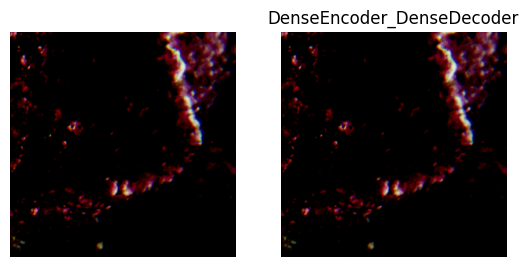

In [16]:
# to see one image
cover,*rest = next(iter(valid_set))
_, H, W = cover.size()
cover = cover[None].to(device)
text = "how are you"
payload = make_payload(W, H, data_depth, text)
payload = payload.to(device)
#generated = encoder.forward(cover, payload)
generated = test(encoder,decoder,data_depth,epochs,cover,payload)
text_return = make_message(generated)
print(text_return)

###Testing begins (from a loaded model)

####Test1 - Save steganographic images

In [17]:
from imageio import imread, imwrite
import os
import torch

epochs = 64
data_depth = 4
test_folder = "/content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val"
save_path = os.path.join(test_folder, f"{data_depth}_{epochs}")
os.makedirs(save_path, exist_ok=True)

for filename in os.listdir(test_folder):
    filepath = os.path.join(test_folder, filename)
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')) or not os.path.isfile(filepath):
        continue

    print(f"Processing: {filepath}")

    cover_im = imread(filepath, pilmode='RGB') / 127.5 - 1.0
    cover = torch.FloatTensor(cover_im).permute(2, 1, 0).unsqueeze(0)
    cover_size = cover.size()

    text = "how are you"
    payload = make_payload(cover_size[3], cover_size[2], data_depth, text)
    cover = cover.to(device)
    payload = payload.to(device)

    with torch.no_grad():
        generated = encoder.forward(cover, payload)[0].clamp(-1.0, 1.0)

    generated_np = (generated.permute(1, 2, 0).cpu().numpy() + 1.0) * 127.5
    save_name = os.path.join(save_path, f"{data_depth}_{epochs}_{filename}")
    imwrite(save_name, generated_np.astype('uint8'))


Processing: /content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/0010.png


<ipython-input-17-2189961398>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cover_im = imread(filepath, pilmode='RGB') / 127.5 - 1.0


Processing: /content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/0001.png


<ipython-input-17-2189961398>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cover_im = imread(filepath, pilmode='RGB') / 127.5 - 1.0


Processing: /content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/0006.png


<ipython-input-17-2189961398>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cover_im = imread(filepath, pilmode='RGB') / 127.5 - 1.0


Processing: /content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/0002.png


<ipython-input-17-2189961398>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cover_im = imread(filepath, pilmode='RGB') / 127.5 - 1.0


Processing: /content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/0004.png


<ipython-input-17-2189961398>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cover_im = imread(filepath, pilmode='RGB') / 127.5 - 1.0


####Test2 - Take a steganographic image from a folder and decode

<ipython-input-15-773863551>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image=torch.tensor(image, dtype=torch.uint8)


Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
how are you


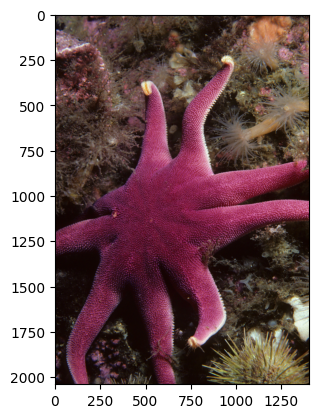

In [18]:
import imageio.v2 as imageio
import torch
import matplotlib.pyplot as plt
import os

steg_folder = "/content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/4_64"
filename = "4_64_0001.png"
image = imageio.imread(os.path.join(steg_folder, filename), pilmode='RGB') / 127.5 - 1.0

# For display
plt.imshow((image + 1.0) / 2.0)

# For model input
image_tensor = torch.FloatTensor(image).permute(2, 0, 1).unsqueeze(0)  # CHW
text_return = make_message(image_tensor)
print(text_return)

####Test3 - Encode to decode in one cell

<ipython-input-19-1235274826>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cover_im = imread("/content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/myval/0004.png", pilmode='RGB') / 127.5 - 1.0
<ipython-input-15-773863551>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image=torch.tensor(image, dtype=torch.uint8)


Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
Too many (or few) errors found by Chien Search for the errata locator polynomial!
WWE is a wrestling sport


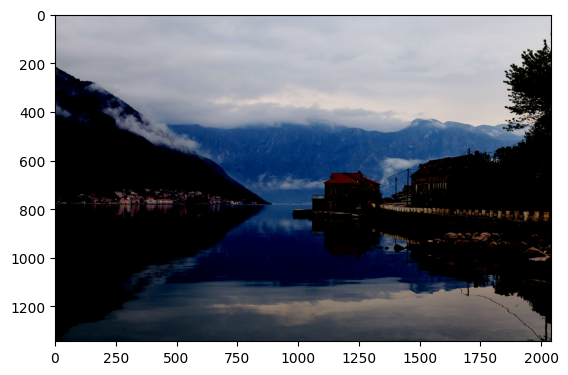

In [19]:
##Input to outut (both encode decode in one cell)
from imageio import imread, imwrite

cover_im = imread("/content/Deep-Steganography-using-Steganogan/dv2k_Dataset/Train/val/myval/0004.png", pilmode='RGB') / 127.5 - 1.0
plt.imshow(cover_im)
cover = torch.FloatTensor(cover_im).permute(2, 1, 0).unsqueeze(0)
cover_size = cover.size()
# _, _, height, width = cover.size()
text = "WWE is a wrestling sport"
payload = make_payload(cover_size[3], cover_size[2], data_depth, text)

cover = cover.to(device)
payload = payload.to(device)
generated = encoder.forward(cover, payload)
text_return = make_message(generated)
print(text_return)

####Generate Difference Image

In [20]:
!pip install onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 78.1 MB/s eta 0:00:00


In [21]:
pip install torch torchvision onnx onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00


In [22]:
# --- Set parameters ---
data_depth = 4        # set to your value
hidden_size = 32      # set to your value
image_height = 360    # set to your value
image_width = 360     # set to your value
checkpoint_path = '/content/Deep-Steganography-using-Steganogan/Image_models/DenseEncoder_DenseDecoder_0.042_2020-07-23_02_08_27.dat'  # update this

# --- Load models ---
encoder = DenseEncoder(data_depth, hidden_size)
decoder = DenseDecoder(data_depth, hidden_size)
checkpoint = torch.load(checkpoint_path, map_location='cpu')
encoder.load_state_dict(checkpoint['state_dict_encoder'])
decoder.load_state_dict(checkpoint['state_dict_decoder'])
encoder.eval()
decoder.eval()

# --- Create dummy inputs ---
dummy_image = torch.randn(1, 3, image_height, image_width)
dummy_payload = torch.randint(0, 2, (1, data_depth, image_height, image_width)).float()

# --- Export to ONNX ---
import torch.onnx
torch.onnx.export(
    encoder,
    (dummy_image, dummy_payload),
    "encoder.onnx",
    input_names=['image', 'payload'],
    output_names=['stego_image'],
    opset_version=11
)
torch.onnx.export(
    decoder,
    dummy_image,
    "decoder.onnx",
    input_names=['stego_image'],
    output_names=['decoded_payload'],
    opset_version=11
)

# --- (Optional) Test ONNX models ---
import onnxruntime as ort
encoder_session = ort.InferenceSession("encoder.onnx")
encoder_output = encoder_session.run(
    None,
    {
        "image": dummy_image.numpy(),
        "payload": dummy_payload.numpy()
    }
)
print("Encoder output shape:", encoder_output[0].shape)
decoder_session = ort.InferenceSession("decoder.onnx")
decoder_output = decoder_session.run(
    None,
    {
        "stego_image": encoder_output[0]
    }
)
print("Decoder output shape:", decoder_output[0].shape)

Encoder output shape: (1, 3, 360, 360)
Decoder output shape: (1, 4, 360, 360)


In [26]:
import torch

# Load the .dat file
data = torch.load("/content/Deep-Steganography-using-Steganogan/Image_models/DenseEncoder_DenseDecoder_0.042_2020-07-23_02_08_27.dat", map_location='cpu')

# Inspect what's inside
print(type(data))
if isinstance(data, dict):
    print("Keys:", data.keys())


<class 'dict'>
Keys: dict_keys(['state_dict_critic', 'state_dict_encoder', 'state_dict_decoder', 'en_de_optimizer', 'cr_optimizer', 'metrics', 'train_epoch', 'date'])


In [28]:
import torch

checkpoint = torch.load("/content/Deep-Steganography-using-Steganogan/Image_models/DenseEncoder_DenseDecoder_0.042_2020-07-23_02_08_27.dat", map_location='cpu')


In [29]:
# Load the .dat checkpoint (you already have this)
checkpoint = torch.load("/content/Deep-Steganography-using-Steganogan/Image_models/DenseEncoder_DenseDecoder_0.042_2020-07-23_02_08_27.dat", map_location='cpu')

# Use your in-notebook model classes
encoder = DenseEncoder()
decoder = DenseDecoder()

# Load the saved weights
encoder.load_state_dict(checkpoint['state_dict_encoder'])
decoder.load_state_dict(checkpoint['state_dict_decoder'])

# Set models to eval mode
encoder.eval()
decoder.eval()

# Save the models as .pth files
torch.save(encoder.state_dict(), "encoder.pth")
torch.save(decoder.state_dict(), "decoder.pth")

# Optional (if you're in Colab): trigger file download
from google.colab import files
files.download("encoder.pth")
files.download("decoder.pth")


TypeError: BasicEncoder.__init__() missing 2 required positional arguments: 'data_depth' and 'hidden_size'